When we merge a branch into another one, our changes can sometimes conflict with other people's commits. Let's say that we're working on a project with another developer named Ninja Jane. We both edit the same file on our own branches, then Jane pushes her branch to the remote and merges it into master:

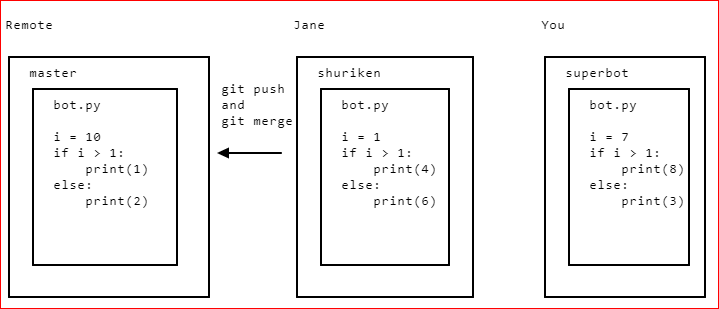

This chain of events results in the following situation:
  
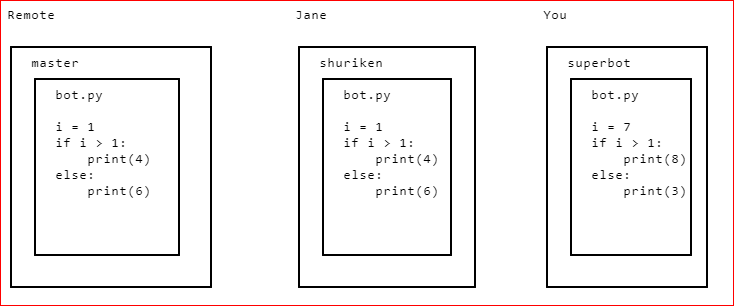

At this point, the commit history for each branch looks like this:
    
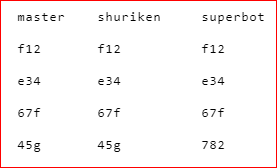    

Because we and Jane branched off of master at the same time and we both made one commit, the histories for the two branches are almost identical. However, the latest commit for master and shuriken is 45g, and the latest commit for superbot is 782.

When we try to merge superbot into master, Git will notice that 45g and 782 both come immediately after 67f, and both edit the same lines in the same files. Because both commits are based on 67f, they're equally valid, and this causes a merge conflict. Git can't overwrite the changes in master with the changes from superbot because it doesn't know which changes are the "correct" ones. Git is designed to preserve everyone's work, so it won't cause a loss of effort by intentionally overwriting one person's commit with another's.

It's not possible for Git to just layer the commits on top of each other, because 782 and 45g both come immediately after commit 67f. If Git layered the changes on top of each other and applied commit 782 from superbot, Jane's changes in commit 45g would be overwritten and lost. If commit 782 in superbot came after commit 45g in the Git history instead, there would be no conflict.

When Git can't merge commits automatically, it informs the user of a merge conflict and asks them to sort it out. Sorting out a merge conflict involves editing the code that conflicts to create the "correct" version. This way, the person who wrote the code is in charge of resolving the issue, and Git isn't intentionally overwriting anyone's changes.

**Task**

* Clone the repo chatbot from /waqas/user/git/chatbot to /home/waqas/chatbot.
* Create a branch.
 * Create a branch called feature/king-bot in the repo chatbot.
 * Switch to the branch feature/king-bot.
 * Edit bot.py and add an appropriately kingly print statement at the end of the file.
 * Commit our changes.
 
* Create another branch with conflicts.
 * Switch to the master branch.
 * Create a branch called feature/queen-bot in the repo chatbot.
 * Switch to the branch feature/queen-bot.
 * Edit bot.py and add an appropriately queenly print statement at the end at the end of the file.
 * Commit our changes.

* Create a merge conflict.
 * Merge feature/king-bot into master.
 * Try merging feature/queen-bot into master.
 * At this point, we should trigger a conflict.

**Answer**

* cd ~
* git clone /waqas/user/git/chatbot
* cd chatbot
* git checkout -b feature/king-bot
* printf "\nprint('I am the king')" >> bot.py
* git add .
* git commit -m "Make more kinglike"


* git checkout master
* git checkout -b feature/queen-bot
* printf "\nprint('I am the queen')" >> bot.py
* git add .
* git commit -m "Make more queenlike"


* git checkout master
* git merge feature/king-bot
* git merge feature/queen-bot

When a merge conflict occurs, Git adds markup lines to the problem files to identify where the conflicts are. These lines can prevent code from executing properly, because the Python interpreter doesn't understand them. It's important to resolve conflicts and remove the markup immediately for this reason.

One way to resolve a conflict is to abort the merge altogether. We can do this with [git merge --abort](https://git-scm.com/docs/git-merge).

We'd typically do an abort if we merged one branch into another by accident, or wanted to deal with large merge conflicts in another way. When we abort a merge, Git resets the working directory and Git history to the state they were in before we tried to merge.

**Task**

* Abort the merge from the last screen, which had conflicts.

**Answer**

* git merge --abort

When a merge conflict occurs, Git will edit the problematic file to add markup indicating where the conflicts are. Here's the markup Git added to our bot.py file from the first screen, when we tried to merge feature/queen-bot into master:

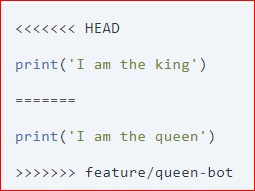

This conflict markup indicates that the current branch (or HEAD branch) contains the line print('I am the king'), but the branch we're trying to merge, feature/queen-bot, contains the line print('I am the queen'). Because the last commit in each branch is exclusive to that branch, Git can't automatically determine which line is the most recent edit. This means we have to manually edit the file to remove the lines that Git added, and leave only the code we want.

Here's how we might edit the bot.py file to address the conflict:

**print('I am the queen')**

We removed all of the Git conflict markup and the alternate code so that only the version we want, print('I am the queen'), remains. After doing this for each section of conflict markup (if there are multiple conflicts), we would then commit the file, which would resolve the merge.

**Task**

* Swich to the master branch of the chatbot repo.
* Merge feature/queen-bot into master.
* Fix the merge markup so the lines from feature/queen-bot are the ones Git retains.
* Add the changes to the staging area and commit them with the commit message Fixed conflicts.
* Push master to the remote.

**Answer**

* cd /home/waqas/chatbot
* git merge feature/queen-bot
* echo "print('I am the queen')" > bot.py
* git add bot.py
* git commit -m "Fixed conflicts"
* git push origin master


In the above example, only one line conflicted. When we're working with larger teams and bigger features, however, it's possible to have a conflict across multiple lines.

Let's say bot.py in the master branch contains the following code:

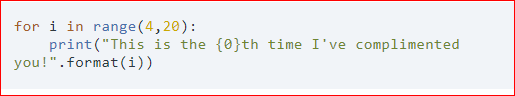

bot.py in the feature/king-bot branch contains this code:
    
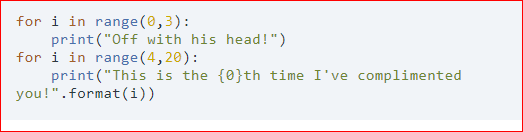

Finally, bot.py in the feature/queen-bot branch contains this code:

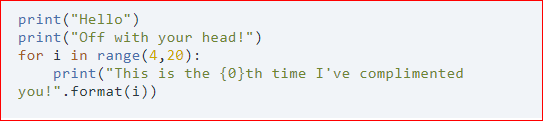

In this case, the first two lines of bot.py would conflict if we tried to merge both feature/king-bot and feature/queen-bot into master. We'd get conflict markup that looks like this:

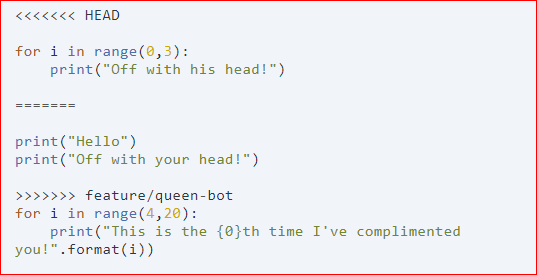

When Git detects a multi-line conflict, it places the entire block into a single merge conflict. This makes it much easier to handle large conflicts, like ones that involve entire functions. The process for addressing them is the same as what we did before; we just need to remove the markup and any conflicting lines we don't want to keep.

**Task**

* Switch into the /home/waqas/chatbot repo.
* Switch to the master branch.
* Create a branch that randomly prints statements.
 * Create a branch called feature/random-printing in the repo chatbot.
 * Switch to the branch feature/random-printing.
 * Edit bot.py to add a block that prints one of three random messages at the end.
 * Commit our changes.
 
* Create another branch with conflicts.
 * Switch to the master branch.
 * Create a branch called feature/dice-roller in the repo chatbot.
 * Switch to the branch feature/dice-roller.
 * Edit bot.py to add a block that generates and displays two random numbers at the end.
 * Commit our changes.

* Create a merge conflict.
 * Merge feature/random-printing into master.
 * Try merging feature/dice-roller into master.
 * At this point, we should trigger a conflict.
 
* Resolve the merge conflict.
 * Resolve the conflict by editing bot.py.
  * Remove the merge conflict markup.
  * Keep whatever lines of code we'd like.
 * Commit bot.py with the message Resolved multi-line conflict.
 
* Push the master branch of chatbot to the remote repo.

**Answer**

* cd ~
* cd chatbot
* git checkout -b feature/random-printing
* printf "\nmessages=['I am great', 'You are great', 'I need more outside time']\nimport random\nmsg=random.choice(messages)\nprint(msg)" >> bot.py
* git add bot.py
* git commit -m "Add random printing"


* git checkout master
* git checkout -b feature/dice-roller
* printf "\nimport random\nd1=random.randint(1,6)\nd2=random.randint(1,6)\nprint('D1: {0} D2: {1}'.format(d1, d2))" >> bot.py
* git add bot.py
* git commit -m "Add dice rolling"


* git checkout master
* git merge feature/random-printing
* git merge feature/dice-roller


* printf "\nimport random\nd1=random.randint(1,6)\nd2=random.randint(1,6)\nprint('D1: {0} D2: {1}'.format(d1, d2))" > bot.py
* git add bot.py
* git commit -m "Resolved multi-line conflict"
* git push origin master

With larger teams, it's possible to have multiple merge conflicts. That can mean several conflicts within a single file, or individual conflicts spread out across different files. When working on large projects involving many files, it's common for a single branch to alter dozens of files. When this happens, we may face merge conflicts that are tricky to resolve.

Although we won't be using them here, this is where Git's graphical merge tools can be helpful. To use them, we'd need to run the [git mergetool](https://git-scm.com/docs/git-mergetool) command, along with the --tool option flag to specify which graphical tool to use. We can pull up a full list of available tools by running git mergetool --tool-help.

A graphical merge tool will show us the branches side by side and highlight the differences visually, like this:

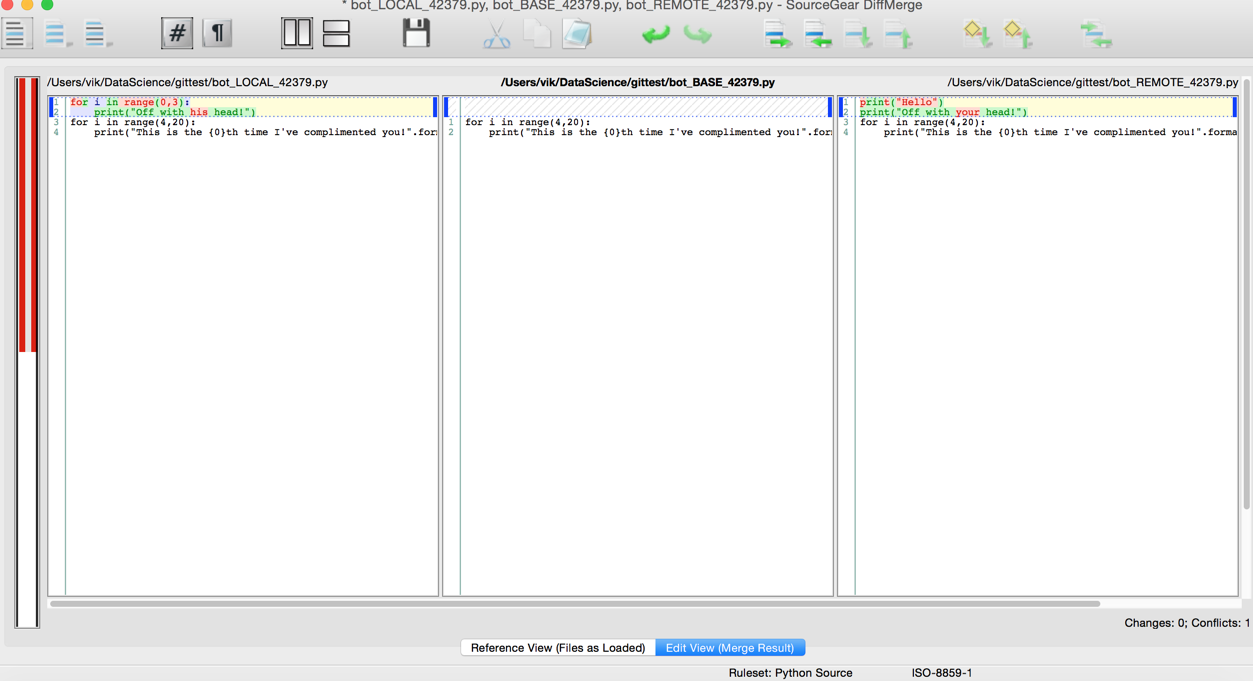

In [2]:
from IPython.display import Image

Image("bDtKd0S.png")

This particular tool displays the HEAD branch on the right and calls it the REMOTE branch. It displays the branch we're merging on the left and calls it the LOCAL branch. The final version is in the center. We need to edit the center version to get the result we want, then save it. The above tool used is DiffMerge; however, we are free to use whichever one we want. The following is a list of available tools we can use:

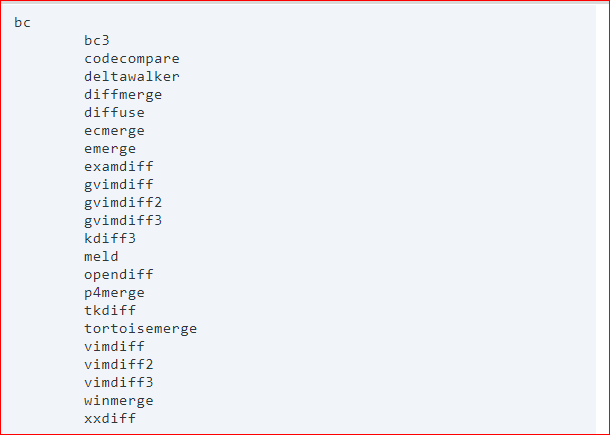

To run a specific tool, we would run **git mergetool --tool=[tool name]**. Note that some of the tools listed only work in a windowed environment. If run in a terminal-only session, they will fail.

In the absence of a graphical tool, it's still possible to sort through multiple merge conflicts -- it's just a bit more work. That's because we have to remove all of the merge conflict markup for each individual conflict manually.

**Task**

* Switch into the /home/waqas/chatbot repo.
* Switch to the master branch.
* Create a branch that inserts print statements into bot.py.
 * Create a branch called feature/more-printing in the repo chatbot.
 * Switch to the branch feature/more-printing.
 * Edit bot.py and add multiple lines that print some text (whatever we'd like).
 * Commit our changes.
 
* Create another branch that inserts print statements into bot.py.
 * Switch to the master branch.
 * Create a branch called feature/more-printing-2 in the repo chatbot.
 * Switch to the branch feature/more-printing-2.
 * Edit bot.py and add different print statements to the same lines we edited in feature/more-printing.
 * Commit our changes.
 
* Create a merge conflict.
 * Merge feature/more-printing into master.
 * Try merging feature/more-printing-2 into master.
 * At this point, we should trigger multiple conflicts.
 
* Resolve the merge conflict.
 * Resolve the conflicts by editing bot.py and keeping the lines we want.
 * Commit bot.py with the message Resolved multiple conflicts.
 
* Push the master branch of chatbot to the remote repo.

**Answer**

* cd ~
* cd chatbot
* git checkout -b feature/more-printing
* printf "\nmessages=['I am great', 'You are great', 'I need more outside time']\nimport random\nmsg=random.choice(messages)\nprint(msg)" >> bot.py
* git add bot.py
* git commit -m "Add more printing"


* git checkout master
* git checkout -b feature/more-printing-2
* printf "\nimport random\nd1=random.randint(1,6)\nd2=random.randint(1,6)\nprint('D1: {0} D2: {1}'.format(d1, d2))" >> bot.py
* git add bot.py
* git commit -m "Add even more printing"


* git checkout master
* git merge feature/more-printing
* git merge feature/more-printing-2


* printf "\nimport random\nd1=random.randint(1,6)\nd2=random.randint(1,6)\nprint('D1: {0} D2: {1}'.format(d1, d2))" > bot.py
* git add bot.py
* git commit -m "Resolved multiple conflicts"
* git push origin master

With some merges, we know that one branch has the "correct" changes, and want to ignore the other branch. We can keep files from one of the conflicting branches only by using git checkout with the --ours and --theirs options when we run into a merge conflict.

For example, if we were trying to merge files from feature/queen-bot into master, we could use git checkout --ours [filename] to only keep the files from master, and git checkout --theirs [filename] to only keep files from feature/queen-bot. In general, --ours will keep files from the current branch, and --theirs will keep files from the branch we're merging in.

If we had multiple files that caused conflicts, it would be daunting to follow this process for every file. Luckily for us, Git has an easy solution! We can add **.** at the end of git checkout --ours to keep all of the files on the current branch. We can do the same for git add to stage multiple files at once!

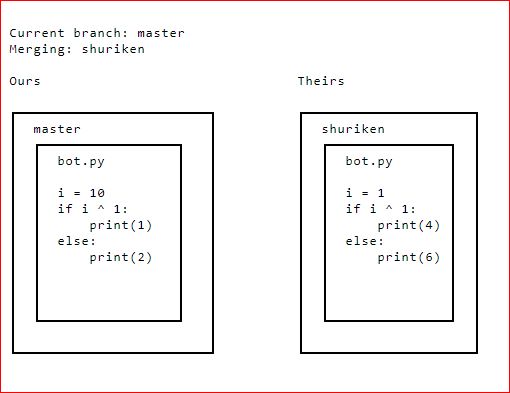

After running git checkout, we'll need to commit the files to complete the merge.

**Task**

* Switch into the /home/waqas/chatbot repo.
* Switch to the master branch.
* Create a branch.
 * Create a branch called feature/remove-bot in the repo chatbot.
 * Switch to the branch feature/remove-bot.
 * Delete bot.py.
 * Stage the deleted file using the command git rm bot.py.
 * Commit our changes with the commit message Remove bot.
 
* Create another branch with conflicts.
 * Switch to the master branch.
 * Create a branch called feature/keep-bot in the repo chatbot.
 * Switch to the branch feature/keep-bot.
 * Edit bot.py and add a print statement to the end of the file.
 * Commit our changes with the message Keeping bot.py.
 
* Create a merge conflict.
 * Merge feature/remove-bot into master.
 * Try merging feature/keep-bot into master.
 * At this point, we should trigger a conflict.
 
* Keep only the files from feature/keep-bot.
* Finish the merge by committing with the message Keeping bot.py.
* Push the branch master to the remote.

**Answer**

* cd ~
* cd chatbot
* git checkout -b feature/remove-bot
* git rm bot.py
* git commit -m "Remove bot"


* git checkout master
* git checkout -b feature/keep-bot
* printf "\nprint('I want to live')" >> bot.py
* git add .
* git commit -m "Keep the bot around"


* git checkout master
* git merge feature/remove-bot
* git merge feature/keep-bot


* git checkout --theirs .
* git add .
* git commit -m "Keeping bot.py"
* git push origin master

There are some files that change very often, and aren't particularly useful to a project. One example is the **.DS_Store** file OS X puts in directories. Another is the **.pyc** files that Python produces when it compiles source files. Neither of these are necessary for the project to work properly, but because they change rapidly, they can create merge conflicts and other problems.

The best way to handle these types of files is to tell Git to ignore them. That means Git won't add them to commits or track them, so we won't have to deal with merge conflicts and other issues they may cause.

To do this, we create a file called .gitignore. Then, we add lines to it indicating which files Git should ignore when adding to the staging area and committing. These lines accept wildcard characters, so we can ignore all files that have a certain extension in a single line.

A wildcard character is a placeholder represented by a single character, which can be represented as any number of characters. The most common wildcard is an asterisk (*), but there are other examples of wildcards.

For example, the following lines in .gitignore instruct Git to ignore all files called .DS_Store, and all files ending with .pyc:

**.DS_Store**

**\*.pyc**

Once we've included those lines, Git won't add new files named **.DS_Store** or that end in **.pyc** to the staging area. It also won't commit them in future commits. It will still track changes to existing files it's already added to a commit, however, and also continue adding them to new commits.

We can find default .gitignore configurations for several popular languages in [this GitHub repo](https://github.com/github/gitignore).

**Task**

* Switch into the /home/waqas/chatbot repo.
* Switch to the master branch.
* Create a file called .gitignore.
* Add the following lines to .gitignore:
 * .DS_Store
 * *.pyc
* Commit the changes with the message Added gitignore.
* Push the master branch to the remote.

**Answer**

* cd ~
* cd chatbot
* git checkout master
* printf ".DS_Store\n*.pyc" > .gitignore
* git add .gitignore
* git commit -m "Added gitignore"
* git push origin master

As we mentioned above, adding files to .gitignore doesn't remove any files that have already been added to a Git commit. Git will still track changes to these files, and add them to future commits. This can be frustrating, especially when those files cause merge conflicts that require a lot of effort to resolve.

Removing files from the Git cache can be helpful in these situations. This will prevent Git from tracking changes to those files, and adding them to future commits.

We can remove files from the Git cache with the git rm command and the --cached flag. For example, the command below will remove any file called .DS_Store from the Git cache, and prevent Git from tracking it:

**git rm --cached .DS_Store**

This will remove any files called .DS_Store from our Git repo, but not from our working directory. The files will still exist on the computer, but will be invisible to Git for version tracking purposes.

**Task**

* Switch into the /home/waqas/chatbot repo.
* Switch to the master branch.
* Remove bot.py from the Git cache.
* Commit our changes with the message Removed bot.py. Remember not use git add here, because that would add bot.py back in!
* Push the master branch to the remote.

**Answer**

* cd ~
* cd chatbot
* git checkout master
* git rm --cached bot.py
* git commit -m "Removed bot.py"
* git push origin master